
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

All Plotly graphs can be checked in Google Colaboratory notebook - https://colab.research.google.com/drive/1JY2XHduV58XR24ZIYDqFe4voBqVz_A1A
This notebook is refactored version of above Google Colaboratory notebook with extended code moved to scr python files

In [3]:
medical_df = pd.read_csv('data/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<span style="background-color: #f60">Відповідь:</span><br/>
 - Створити усереднений графік залежності віку до витрат окремо для курців і некурців
 - Порахувати середню витрату для груп з 0, 1, 2, 3, 3+ дітей
 - Побудувати графік залежністі bmi до витрат
 - Порахувати середні витрати для кожного регіону
 - Порахувати середні витрати для кожного регіону окремо для чоловіків і жінок, курців і не курців, і т.д

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [4]:
from mlpeople.visualization.distributions.histograms import px_histogram

In [5]:
px_histogram(medical_df, x='charges', color='sex')
px_histogram(medical_df, x='charges', color='region');

<span style="background-color: #f60">Відповідь:</span><br/>
 - Медіана для чоловіків і жінок приблизно однакова, але при цьому у чоловіків значення у 3у і 4у квартилях більш розкидані
 - Присутня невелика різниця у витратах по різних регіонах.
 - Два найбільші значення знаходяться у регіоні southeast.
 - Найбільше середнє значеннє витрат спостерігається у регіоні northeast, найнижче у southwest

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [6]:
from mlpeople.visualization.distributions.histograms import px_histogram_comparison

In [7]:
px_histogram_comparison(
    medical_df,
    x='region',
    color='smoker',
    title_left='Smokers count per Region',
    title_right='Smokers percent per Region'
)
px_histogram_comparison(
    medical_df,
    x='children',
    color='smoker',
    title_left='Children count and Smokers count',
    title_right='Children count and Smokers percent'
);


<span style="background-color: #f60">Відповідь:</span><br/>
 - Присутня приблизно однакова кількість даних по регіонах з невеликою перевагю southeast регіону над іншими.
 - Люди з southeast регіону більш схильні до куріння, а люди з northwest і southwest регіонів курять трохи менше середнього
 - Значна частина людей взагалі не мають дітей
 - Люди з 2а і 3а дітьми здається трохи більше схильні до куріння ніж люди без дітей чи з 1ю дитиною

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [8]:
from mlpeople.visualization.distributions.violins import px_violin

In [9]:
px_violin(medical_df, x='children', y='charges', title='Children vs. Charges');

<span style="background-color: #f60">Відповідь:</span><br/>
 - Загалом розподіли витрат для груп із різною кількістю дітей є подібними; суттєвих відмінностей між ними не спостерігається.
 - Розподіл для групи з 5 дітьми дещо відрізняється, однак це, ймовірно, пов’язано з малою кількістю спостережень у цій групі.
 - Для всіх груп найбільша концентрація витрат припадає на діапазон 5–10 тис.
 - Для групи без дітей розподіл є ширшим, з помітною кількістю значень у діапазонах 2–3 тис. та 10–15 тис.
 - Для всіх груп кількість спостережень різко зменшується при витратах понад 15 тис.
 - Для груп із 2 та 3 дітьми спостерігається трохи більше випадків витрат у діапазоні 40–50 тис.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [10]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [28]:
from mlpeople.models.linear import (
    estimate_linear,
    rmse_df_for_params,
    try_parameters
)


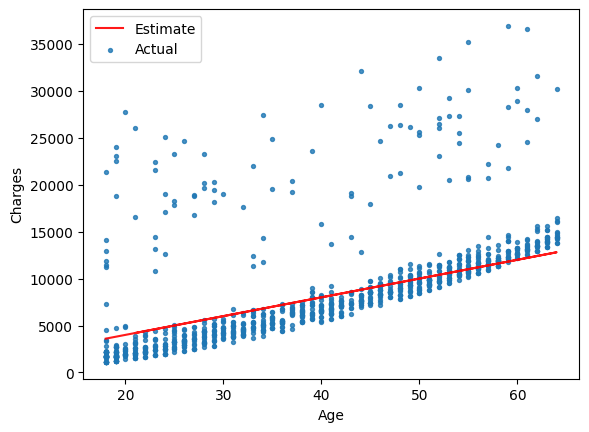

In [24]:
try_parameters(non_smoker_df, 200, 0, x='age', y='charges');

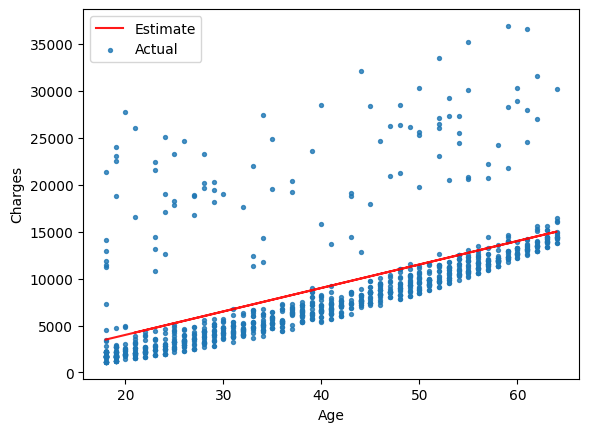

In [26]:
try_parameters(non_smoker_df, 250, -1000, x='age', y='charges');

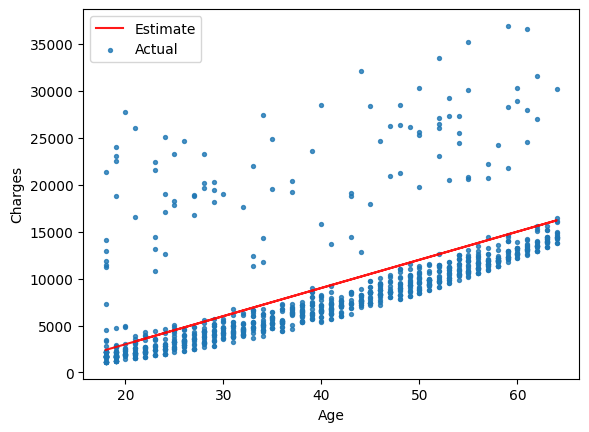

In [27]:
try_parameters(non_smoker_df, 300, -3000, x='age', y='charges');

<span style="background-color: #f60">Відповідь:</span><br/>
 - w міняє кут нахилу прямої до осі OX. b це точка перетину лінії з осею OY.
 - Міняючи w i b можна зобразити будь яку лінію
 - параметри w близько 300 і b в межах від -4000 до -2000 здаються оптимальними

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [29]:
def rmse(predictions, actual):
    square_diffs = np.square(actual - predictions)
    square_diff_sum = np.sum(square_diffs)
    n = len(actual)
    mse = square_diff_sum / n
    rmse = np.sqrt(mse)

    return rmse

def rmse_for_params(df, w=0, b=0, x='age'):
    actual = df['charges']
    x = df[x]

    estimated_charges = estimate_linear(x, w, b)

    return rmse(estimated_charges, actual)
    


In [34]:
print(f'w=300, b=-3000, rmse={rmse_df_for_params(non_smoker_df, 300, -3000, features="age", target="charges")}')
print(f'w=300, b=-4000, rmse={rmse_df_for_params(non_smoker_df, 300, -4000, features="age", target="charges")}')
print(f'w=300, b=-3500, rmse={rmse_df_for_params(non_smoker_df, 300, -3500, features="age", target="charges")}')
print(f'w=310, b=-3600, rmse={rmse_df_for_params(non_smoker_df, 310, -3600, features="age", target="charges")}')
print(f'w=290, b=-3400, rmse={rmse_df_for_params(non_smoker_df, 290, -3400, features="age", target="charges")}')
print(f'w=290, b=-3300, rmse={rmse_df_for_params(non_smoker_df, 290, -3300, features="age", target="charges")}')
print(f'w=285, b=-3300, rmse={rmse_df_for_params(non_smoker_df, 285, -3300, features="age", target="charges")}')
print(f'w=290, b=-3200, rmse={rmse_df_for_params(non_smoker_df, 290, -3200, features="age", target="charges")}')
print(f'w=290, b=-3100, rmse={rmse_df_for_params(non_smoker_df, 290, -3100, features="age", target="charges")}')
print(f'w=290, b=-3000, rmse={rmse_df_for_params(non_smoker_df, 290, -3000, features="age", target="charges")}')
print(f'w=290, b=-2900, rmse={rmse_df_for_params(non_smoker_df, 290, -2900, features="age", target="charges")}')
print(f'w=295, b=-3000, rmse={rmse_df_for_params(non_smoker_df, 295, -3000, features="age", target="charges")}')


w=300, b=-3000, rmse=4700.736524304107
w=300, b=-4000, rmse=4725.9133994520325
w=300, b=-3500, rmse=4686.746277005344
w=310, b=-3600, rmse=4704.445908503114
w=290, b=-3400, rmse=4691.662908935689
w=290, b=-3300, rmse=4683.929633926176
w=285, b=-3300, rmse=4696.906994750323
w=290, b=-3200, rmse=4678.321577239076
w=290, b=-3100, rmse=4674.846387267674
w=290, b=-3000, rmse=4673.508821970761
w=290, b=-2900, rmse=4674.310716408083
w=295, b=-3000, rmse=4682.474801579417


<span style="background-color: #f60">Відповідь:</span><br/>
 - найнижче значення rmse=4673.508821970761 для w=290, b=-3000
 - стратегія підбору наступна:
    - оцінюємо значення на вісі x i y для розуміння порядку значення w
        - у нашому випадку значення на вісі Y на 2-3 порядки більші ніж значення на вісі X, відповідно значення w буде більше 100
    - почати з b = 0 і підібрати оптимальне значення w (приблизно рівне нахилу зміщення точок на графіку)
    - маючи оптимальне w для b=0 починаємо міняти b великими кроками і знаходимо значеняя з мінімальним rmse
    - далі пробуємо мінімузувати rmse покроково міняючи w і b меншими кроками вверх або вниз залежно від того як міняється rmse


In [40]:
rmse_df_for_params(non_smoker_df, [300, 10], -3000, features=["age", "bmi"], target="charges")

np.float64(4736.036482970537)